# How to manipulate qubits using Qiskit

There are several ways to make a quantum computer, but the most common one is the universal quantum computer. Algorithms run on these computers are essentially a set of different gate operations imposed on qubits which together form a quantum circuit. We're therefore going to start by manipulating qubits by creating such circuits.

In [11]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, IBMQ, execute
from qiskit.tools.visualization import circuit_drawer, plot_histogram

# This is only to disable extra warnings/messages
import logging
logging.getLogger("qiskit.tools.visualization").setLevel(logging.ERROR)

In [8]:
# Save your credentials (API Token) from https://quantumexperience.ng.bluemix.net/qx/account,
# looking for "Personal Access Token" section.
# NOTE: you need to save your credentials only once, so this cell should only be run once!
APItoken = '11904784e5cf2d8854c1451e8dc6ba02017cb747eebee8414afaf5f0f23f49c6ff201a456eb0be417f228d72a23e07f5fa7dcf17e7c72d23bc341e569b859285'
#ProjectURL = ''
IBMQ.save_account(APItoken) #ProjectURL)

# Authenticate with the IBM Q API in order to use online devices.
# You need your credentials (API Token) to be already saved.
IBMQ.load_account()

Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## How to set up a circuit 

the figure below shows an empty circuit, where each horizontal line represents the evolution of a qubit with time proceeding from left to right. The five qubits are labeled in order as: q[0], q[1], q[2], q[3] and q[4]. The qubits are always initialized in state |0> (notation for the quantum state 0).
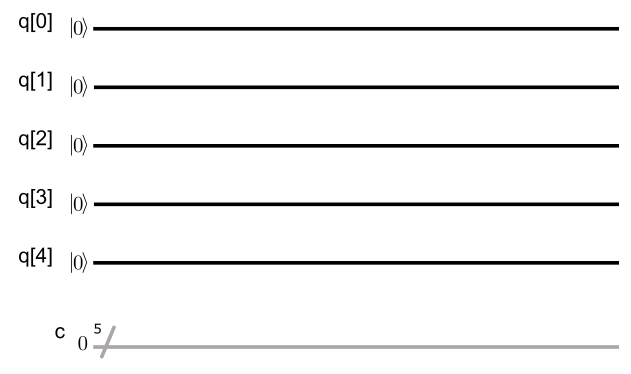
Classical bits -- used to store measurement results -- are indicated by the letter "c" and the number "5" indicates that there are five classical bits in the register being represented with the grey line.

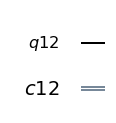

In [24]:
# The following code sets up an empty circuit with one qubit:
# Create a Quantum Register with 1 qubit. The initial state is |0>
q = QuantumRegister(1)
# Create a Classical Register with 1 bit.
c = ClassicalRegister(1)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Plot the circuit
qc.draw(output='mpl')

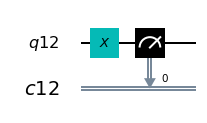

In [25]:
# To add gates (do not worry about the type of gate we're implementing here) and measure the qubits do the following:
# Place an X gate on the qubit wire. The registers are zero-indexed. 
qc.x(q[0])

# Measure the qubits into the classical register
qc.measure(q, c)

# Draw the circuit
qc.draw(output='mpl')

Now that the quantum circuit has been defined and drawn, let's execute it on a quantum simulator, running the circuit 100 times. Each run and measurement of the circuit is called a _shot_.

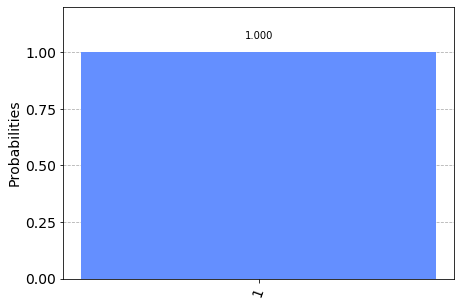

In [28]:
# Retrieving which simulator that we're going to use
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the simulator, running it 100 times.
job_sim = execute(qc, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Plot the results on a bar chart
counts = result_sim.get_counts(qc)
plot_histogram(counts)

We see here that all runs resulted in our qubit being measured to 1. Now, you can try implementing your own circuits!

## H: Hadamard gate

As with bits, qubits can be either 0 or 1, but it can also be in something that we call a _superposition_ of 0 and 1. Actually, when it is in this superposition we say that it has a certain probability of being 0 and of being 1. It is when we observe the qubit that we force it to take a value, and then it will be either 0 or 1 depending on the probability. We can therefore think of a qubit as a coin spinning where heads equals 0 and tails equals 1.

The Hadamard gate sets a qubit that is state 0 or state 1 into superposition, meaning it has now an equal probability of being either 0 or 1, like this:
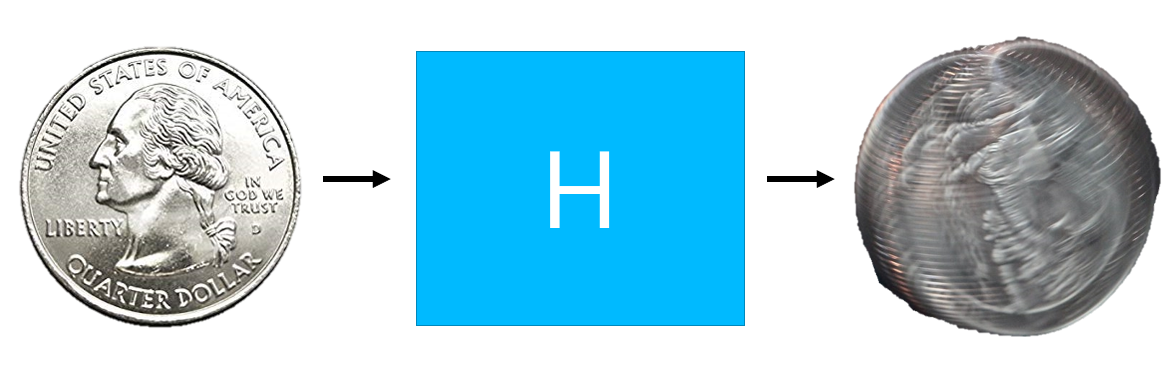

__Task 1:__ Create an empty circuit with a single qubit. Name the circuit _circ_

In [ ]:
## ANSWER HERE ##

In [41]:
## Run this cell afterwards to verify that you did it correctly ##
if circ.n_qubits == 1 and not circ.data:
    print('Good job!')
else:
    print('Something went wrong')

Good job!


__Task 2:__ Add the Hadamard gate on the qubit, and perform 100 shots. Visualize all measurements in a plot.

In [ ]:
## ANSWER HERE ##

##### Q: What does this plot tell us?